# Problem Statement
The dataset contains information on loans issued between 2007 and 2011. The task is to perform an exploratory data analysis (EDA) to understand the characteristics of the loan data and uncover insights that might be useful for business decisions.

## Step 1: Loading and Inspecting Data

In [102]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Print version of each library
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("SciPy version:", scipy.__version__)

NumPy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.4
Seaborn version: 0.13.2
SciPy version: 1.13.1


In [103]:
# Load the dataset
loan_data = pd.read_csv("loan.csv")

# Check the first few rows and column data types
loan_data.head()

C:\Users\gsahoo\AppData\Local\Temp\ipykernel_9684\1079001071.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [104]:
# Check the shape of loan data
print(loan_data.shape)

# Display the NaN values in all columns
loan_data.isnull().sum()

(39717, 111)


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Step 2: Data Cleaning - Check for missing values, duplicates, or inconsistencies

In [105]:
# Drop columns where all values are NaN
loan_data.dropna(axis=1, how='all', inplace=True)
loan_data.shape

(39717, 57)

In [106]:
# Drop columns where all values are 0
loan_data = loan_data.loc[:, (loan_data != 0).any(axis=0)]
loan_data.shape

(39717, 55)

In [107]:
# Drop columns where NaN values are more than 50%
loan_data = loan_data.dropna(axis=1, thresh=int((0.5) * len(loan_data)))
loan_data.shape

(39717, 52)

In [108]:
#Drop duplicates if any
loan_data = loan_data.drop_duplicates()
loan_data.shape

(39717, 52)

In [109]:
#Drop irrelevant columns for analysis
loan_data = loan_data.drop(columns=['id', 'member_id', 'emp_title', 'title', 'url', 'zip_code'])
loan_data.shape

(39717, 46)

In [110]:
# Convert term column to int
loan_data['term'] = loan_data['term'].apply(lambda x: int(x.replace('months', '').strip()))

# Convert int_rate column to float
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

In [111]:
# Convert 'annual_inc' to numeric, handling scientific notation and non-numeric values
loan_data['annual_inc'] = pd.to_numeric(loan_data['annual_inc'], errors='coerce')

In [112]:
loan_data.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
desc                           object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                     object
total_acc   

In [113]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39661.0,39020.000000,39678.0
mean,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.043260,0.0
std,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.204324,0.0
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,2.000000,0.0


## Step 3: Univariate Analysis - Descriptive Statistics for following variables:
- Numerical
1. Loan Amount (loan_amnt)
2. Funded Amount (funded_amnt)
3. Interest Rate (int_rate)
4. Debt to Income Ratio (dti)
5. Installment (installment)
6. Annual Income
- Categorical
1. Term (term)
2. Grade (grade)
3. Sub Grade (sub_grade)
4. Loan Status (loan_status)
5. Home Ownership (home_ownership)
6. Loan Purpose (purpose)
7. Loan Verification Status (verification_status)

### Distribution of Loan Amount and Funded Amount

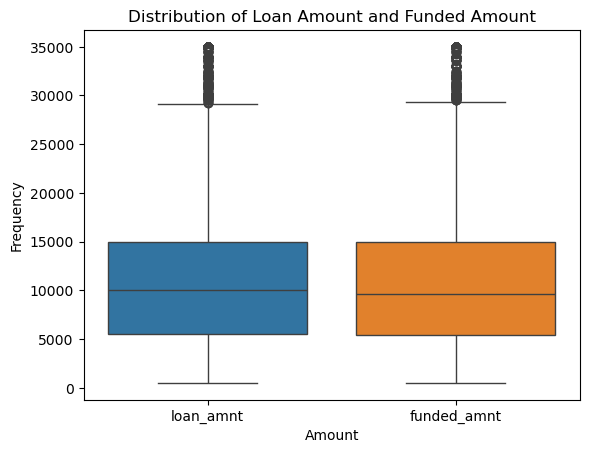

In [114]:
sns.boxplot(data=loan_data[['loan_amnt', 'funded_amnt']])
plt.title('Distribution of Loan Amount and Funded Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

- The loan amount is mostly between 5500 to 15000 where outliers are mostly above 30000.
- The funded amount is mostly between 5400 to 15000 where outliers are mostly above 30000.

### Distribution of Interest Rate and Debt to Income Ratio

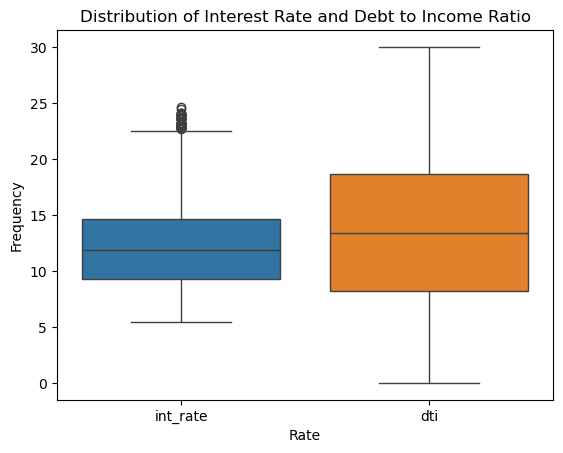

In [115]:
sns.boxplot(data=loan_data[['int_rate', 'dti']])
plt.title('Distribution of Interest Rate and Debt to Income Ratio')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

- The interest rate is mostly bwtween 9.25% to 14.59% where outliers are above 22.5%.
- The debt to income ration is mostly between 8.17% to 18.6%.

### Distribution of Installment

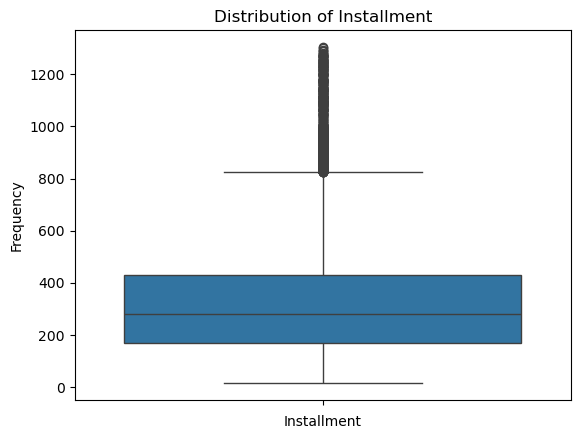

In [116]:
sns.boxplot(data=loan_data['installment'])
plt.title('Distribution of Installment')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.show()

- The installment is mostly between 167.02 to 430.78 with outliers are above 800.

### Distribution of Annual Income

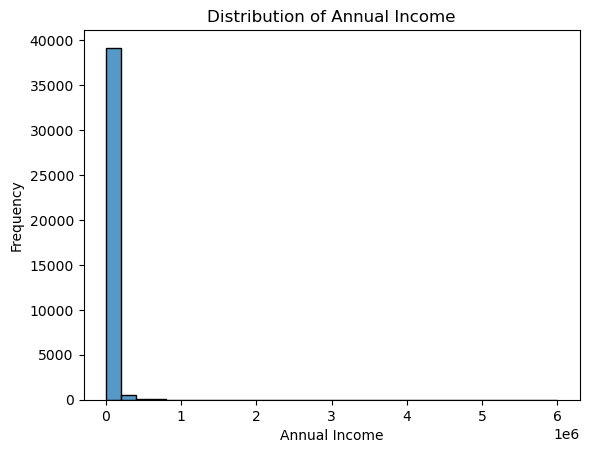

In [117]:
sns.histplot(data=loan_data['annual_inc'], bins=30)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

- Most loan applicants has annual income below 100,000.

### Distribution of Term

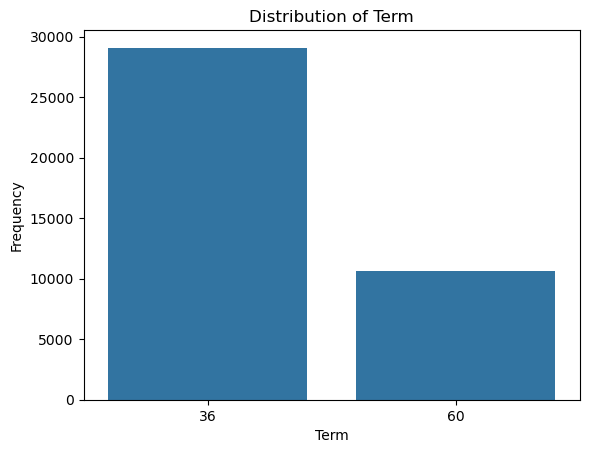

In [118]:
sns.countplot(x='term', data=loan_data)
plt.title('Distribution of Term')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.show()

- Loan taken for 3 years is almost thrice the loan taken for 5 years. So mostly 3 years loan is preffered.

### Distribution of Grade, Sub-Grade, Loan Status, Home Ownership, Purpose and Verification Status

C:\Users\gsahoo\AppData\Local\Temp\ipykernel_9684\2395186689.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels
C:\Users\gsahoo\AppData\Local\Temp\ipykernel_9684\2395186689.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels
C:\Users\gsahoo\AppData\Local\Temp\ipykernel_9684\2395186689.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels
C:\Users\gsahoo\AppData\Local\Temp\ipykernel_9684\2395186689.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

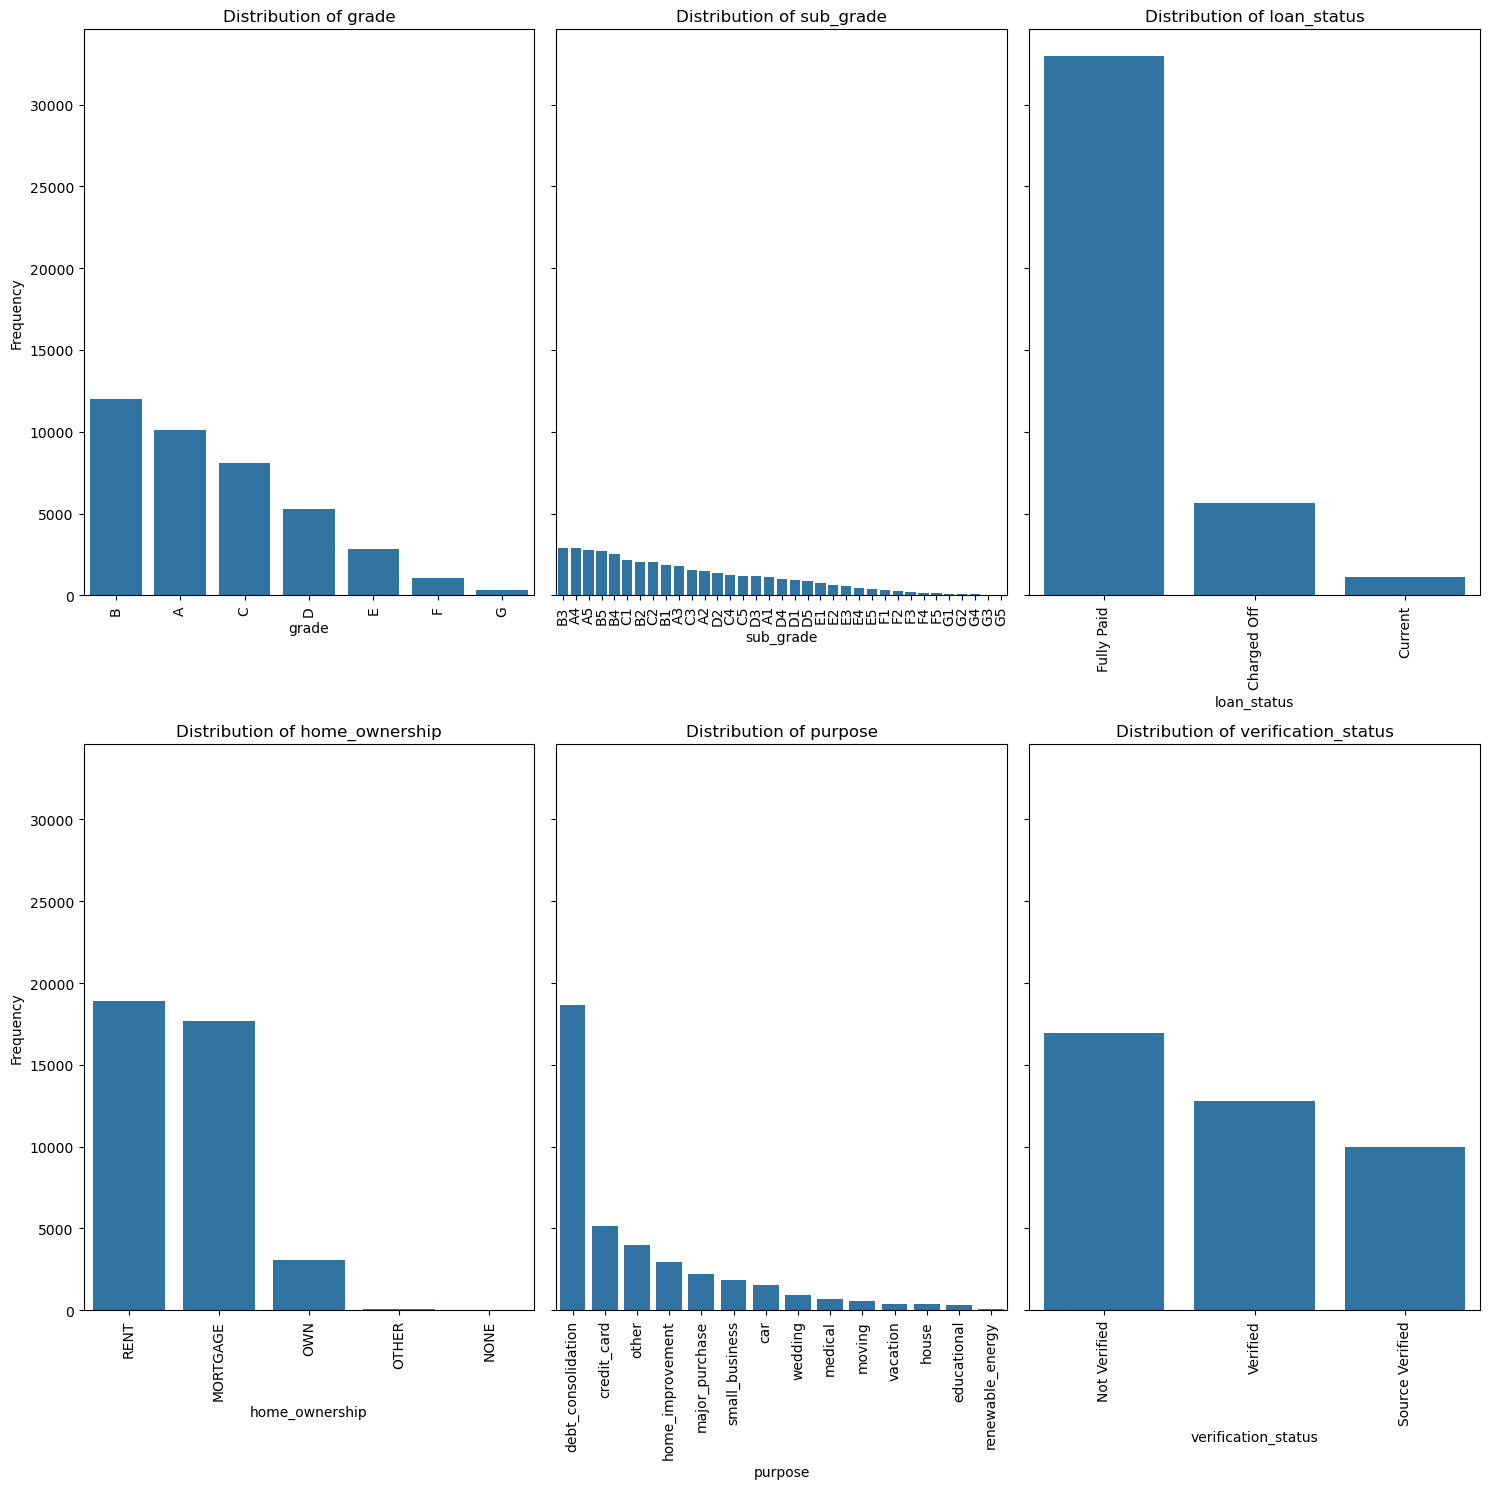

In [119]:
columns_to_plot = ['grade', 'sub_grade', 'loan_status', 'home_ownership', 'purpose', 'verification_status']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15), sharey=True)

# Flatten axes for easy iteration (in case of single-row or single-column layouts)
axes = axes.flatten()

for ax, col in zip(axes, columns_to_plot):
    # Get the order of categories in decreasing count
    order = loan_data[col].value_counts().index
    
    sns.countplot(x=col, data=loan_data, ax=ax, order=order)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

- The majority of loans are taken by borrowers with Grade B, A, and C, with the highest concentrations observed in sub-grades B3, A4, A5, B5, B4, and C1.
- The number of charged-off loans is approximately one-sixth of the total number of fully paid loans, indicating a significant proportion of defaults.
- A substantial number of loans are taken by individuals who rent or mortgage their homes, suggesting that homeownership status is a key factor for loan applicants.
- The most common reason for taking out loans is debt consolidation, reflecting a trend of borrowers seeking to streamline or reduce existing debt obligations.
- A majority of loans are granted to individuals whose income source is not verified, potentially indicating more lenient lending practices or reliance on other factors for loan approval.

## Step 4: Bivariate Analysis - Descriptive Statistics for following variables:

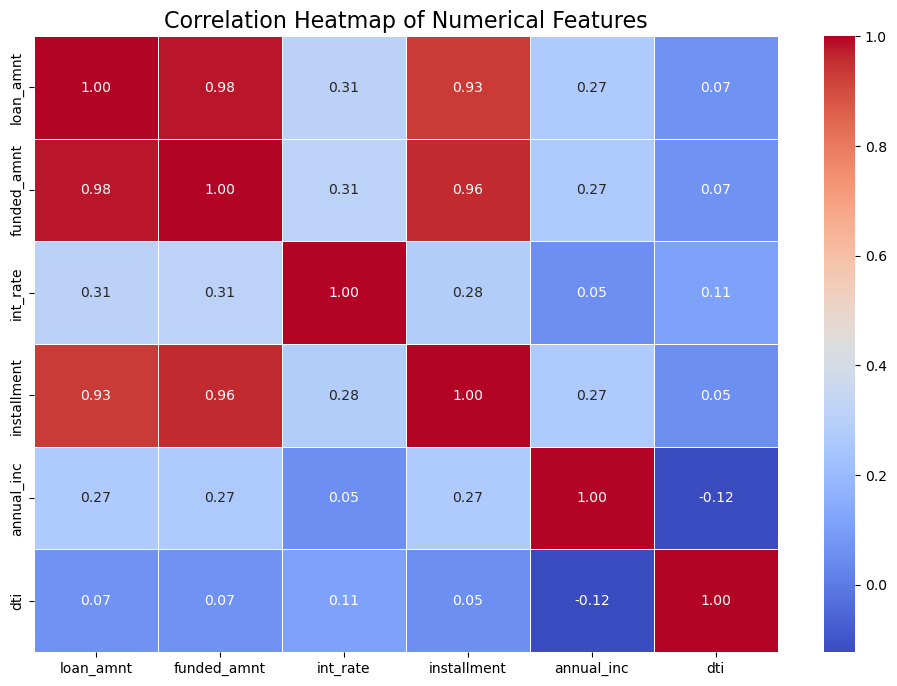

In [120]:
# List of numerical features to include in the correlation heatmap
numerical_features = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']

# Filter the DataFrame to only include the selected numerical features
numerical_df = loan_data[numerical_features]

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adding a title to the heatmap
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)

# Show the plot
plt.show()


Categorical Variables: Frequency count of categorical variables.

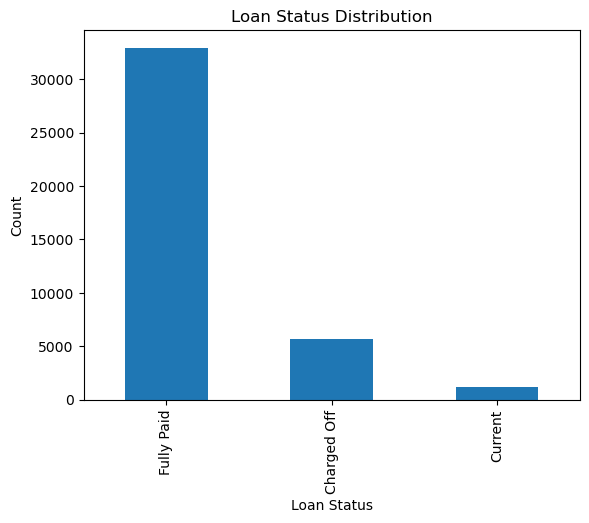

In [121]:
# Check for frequency of loan status
loan_data['loan_status'].value_counts().plot(kind='bar')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

Step 4: Bivariate Analysis
Loan Amount vs. Interest Rate: Look at the relationship between loan amount and interest rate.

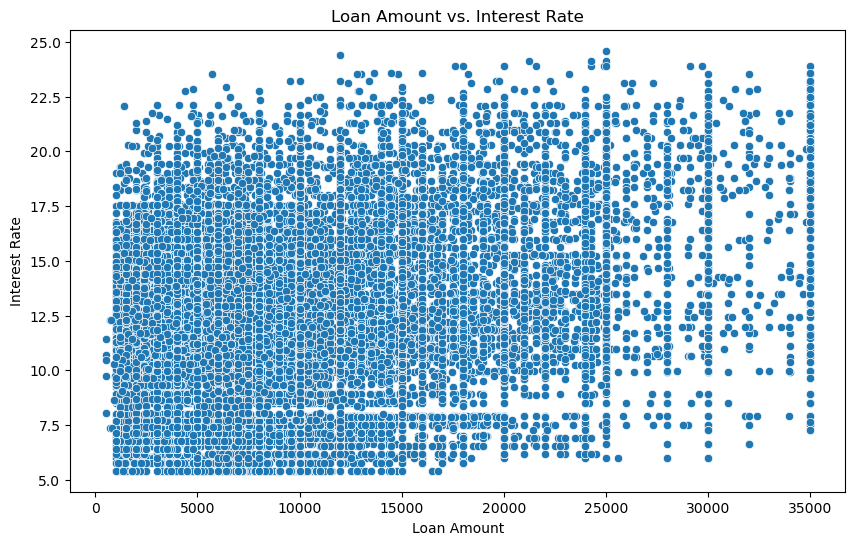

In [122]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=loan_data, x='loan_amnt', y='int_rate')
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

Loan Status by Loan Type: Compare loan status across different loan types.

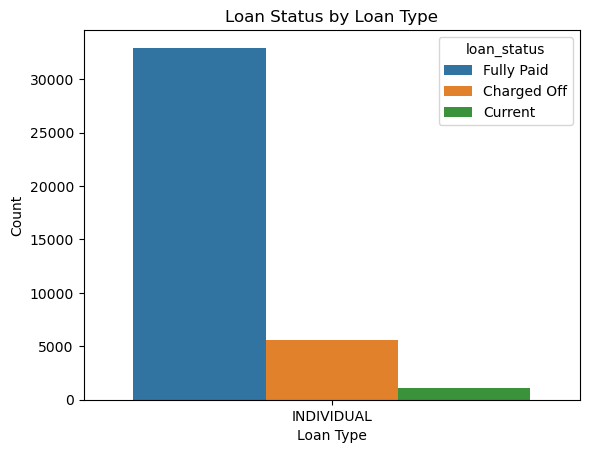

In [123]:
# Use a boxplot or bar plot to show loan status by loan type
sns.countplot(data=loan_data, x='application_type', hue='loan_status')
plt.title('Loan Status by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.show()

Correlation Matrix: To see how different numerical variables are correlated.

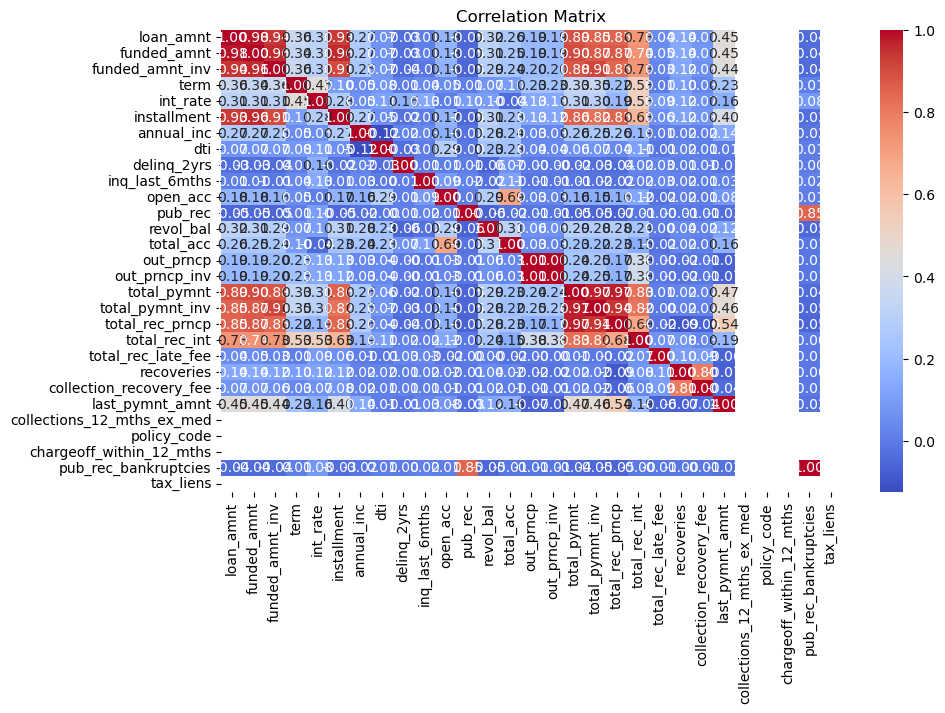

In [124]:
# Calculate the correlation matrix again after cleaning data
corr_matrix = loan_data.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [125]:
# Select only a subset of columns (e.g., top numerical variables)
columns_of_interest = ['loan_amnt', 'int_rate', 'avg_cur_bal', 'annual_inc']
corr_matrix = loan_data[columns_of_interest].corr()

# Plot the correlation matrix for the selected columns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix for Selected Columns')
plt.show()

KeyError: "['avg_cur_bal'] not in index"

In [ ]:
print(loan_data.dtypes)


id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [ ]:
loan_data['term'].dtype  # Should return int


dtype('int32')

Did some data cleaning for handling string float values

In [ ]:
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '', regex=False)  # Remove the '%' symbol

# Convert the interest rate to float
loan_data['int_rate'] = loan_data['int_rate'].astype(float)

# Convert percentage to decimal
loan_data['int_rate'] = loan_data['int_rate'] / 100

# Verify the conversion
print(loan_data['int_rate'].head())

0    0.1065
1    0.1527
2    0.1596
3    0.1349
4    0.1269
Name: int_rate, dtype: float64


In [ ]:
loan_data['term'] = loan_data['term'].str.strip()  # Remove leading/trailing spaces
loan_data['term'] = loan_data['term'].str.extract('(\d+)')  # Extract the numeric part (using regex)

# Convert the loan term to integer
loan_data['term'] = loan_data['term'].astype(int)

# Verify the conversion
print(loan_data['term'].head())


Step 5: Feature Engineering


In [ ]:

loan_data['loan_to_income'] = loan_data['loan_amnt'] / loan_data['annual_inc']
print(loan_data['loan_to_income'])


0        0.208333
1        0.083333
2        0.195886
3        0.203252
4        0.037500
           ...   
39712    0.022727
39713    0.472222
39714    0.050000
39715    0.025000
39716    0.340909
Name: loan_to_income, Length: 39717, dtype: float64


Step 6: Visualization
Using matplotlib or seaborn to create visualizations for key insights.

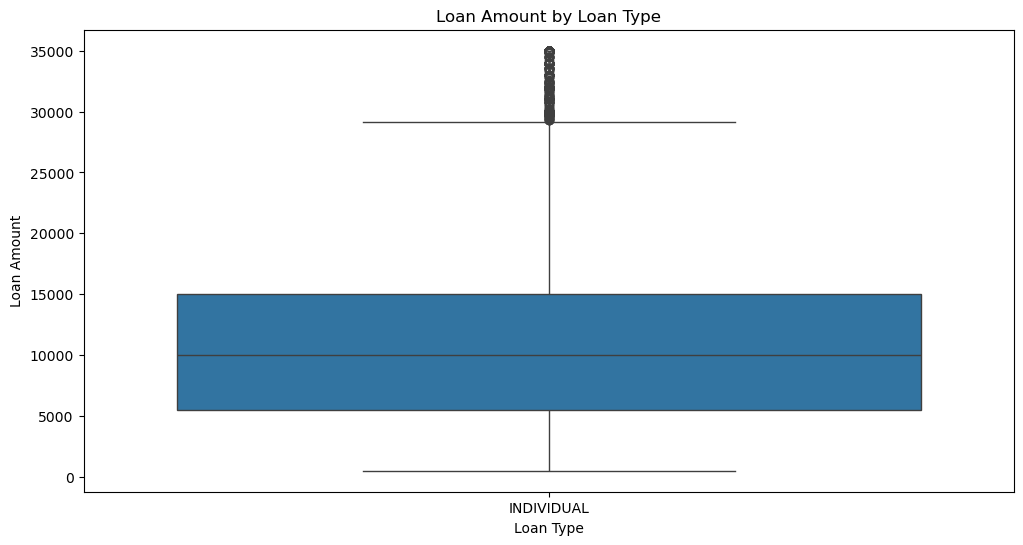

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=loan_data, x='application_type', y='loan_amnt')
plt.title('Loan Amount by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Loan Amount')
plt.show()